#Project 1 - Report 1 code

In [35]:
#Please have the 'playlists4000.txt' file in the same directory as this notebook.

fd = open("playlists4000.txt",mode='r',encoding='utf8',newline='\n')

raw = fd.read().splitlines()

hashtable = dict()

for line in raw:
    first, second = line.split(sep="::")
    hashtable.setdefault(first, []).append(second)

In [36]:
len(hashtable.values())

4000

In [37]:
#Longest transaction
longest = 0
for x in hashtable.values():
    if (len(x) > longest):
        longest = len(x)

longest

110

In [38]:
#Shortest transaction
shortest = longest
for x in hashtable.values():
    if(len(x) < shortest):
        shortest = len(x)
shortest

1

In [39]:
#Support counting

#Dictionary of 1-itemsets with support count

counts = dict()

for line in raw:
    first, second = line.split(sep="::")
    x = counts.setdefault(second,0)
    counts[second] = x+1

In [40]:
len(counts.values())

2578

In [41]:
#Number of frequent 1-itemsets with support count threshold 400
freq = 0

for x in counts:
    if(counts[x] > 40):
        freq += 1

freq

455

In [42]:
#Highest support for a 1-itemset
max(counts.values())

194

In [43]:
import pandas as pd

df_counts = pd.DataFrame.from_dict(counts, orient='index')

df_counts = df_counts.set_axis(['support'],axis=1)

df_counts.head()

,support
0,132
1,106
2,123
3,77
4,86


In [44]:
plot_df = df_counts.loc[df_counts['support'] > 50]

plot_df = plot_df.sort_values(by=['support']).reset_index()

plot_df = plot_df.rename(columns={'index' : 'Items','support':'Support'})

plot_df

,Items,Support
0,541,51
1,805,51
2,315,51
3,322,51
4,439,51
...,...,...
329,320,172
330,167,172
331,297,186
332,203,187


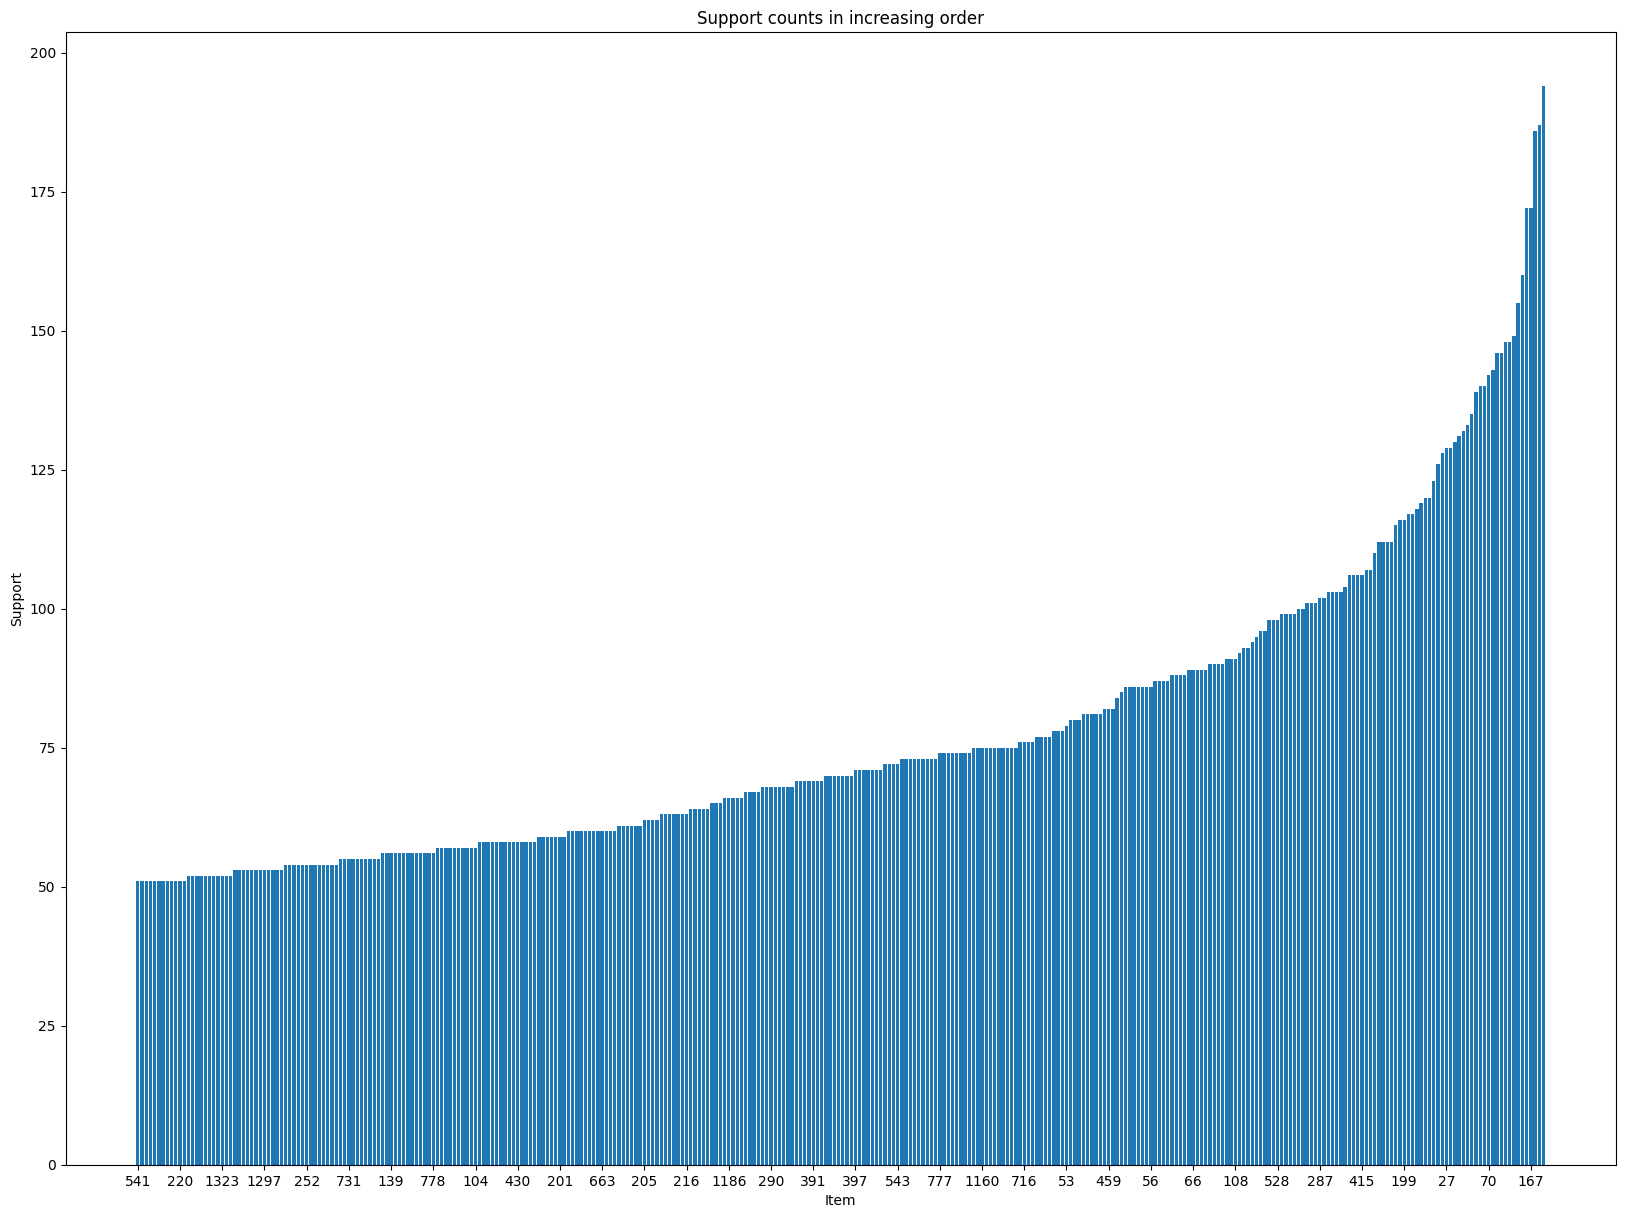

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num=1,figsize=(20,15), dpi=100)
plt.bar(plot_df['Items'], plot_df['Support'])
plt.xticks(np.arange(0, 333, 10))
plt.xlabel('Item')
plt.ylabel('Support')
plt.title('Support counts in increasing order')
plt.show()

In [48]:
def apriori(minsup,minconf):
    # FP-Tree generateion of 4-itemsets with support count and pruning
    from collections import OrderedDict
    fp = OrderedDict()

    # 1-itemset support counting
    for t in hashtable.values():
        for ii in range(len(t)):
            i = int(t[ii])
            fp[i] = fp.get(i, OrderedDict())
            fp[i]["count"] = fp[i].get("count", 0) + 1

    # 2-itemset support counting
    for t in hashtable.values():
        for ii in range(len(t)):
            i = int(t[ii])
            # if support count is too low
            # prune 1-itemset
            if i in fp and fp[i]["count"] < minsup:
                continue
            if i not in fp:
                continue
            for ji in range(ii+1, len(t)):
                j = int(t[ji])
                fp[i][j] = fp[i].get(j, OrderedDict())
                fp[i][j]["count"] = fp[i][j].get("count", 0) + 1

    # 3-itemset support counting            
    for t in hashtable.values():
        for ii in range(len(t)):
            i = int(t[ii])
            # if fp[i]["count"] < minsup:
            #     continue
            if i not in fp:
                continue
            for ji in range(ii+1, len(t)):
                j = int(t[ji])
                # if support count is too low
                # prune 2-itemset
                if j in fp[i] and fp[i][j]["count"] < minsup:
                    del fp[i][j]
                    continue
                if j not in fp[i]:
                    continue    
                for ki in range(ji+1, len(t)):
                    k = int(t[ki])
                    fp[i][j][k] = fp[i][j].get(k, OrderedDict())
                    fp[i][j][k]["count"] = fp[i][j][k].get("count", 0) + 1

    # 4-itemset support couting
    for t in hashtable.values():
        for ii in range(len(t)):
            i = int(t[ii])
            # if fp[i]["count"] < minsup:
            #     continue
            if i not in fp:
                continue
            for ji in range(ii+1, len(t)):
                j = int(t[ji])
                # if fp[i][j]["count"] < minsup:
                #     continue
                if j not in fp[i]:
                    continue 
                for ki in range(ji+1, len(t)):
                    k = int(t[ki])
                    # if support count is too low
                    # prune 3-itemset
                    if k in fp[i][j] and fp[i][j][k]["count"] < minsup:
                        del fp[i][j][k]
                        continue
                    if k not in fp[i][j]:
                        continue
                    for li in range(ki+1, len(t)):
                        l = int(t[li])
                        fp[i][j][k][l] = fp[i][j][k].get(l, OrderedDict())
                        fp[i][j][k][l]["count"] = fp[i][j][k][l].get("count", 0) + 1
                    
    ctr = 0
    for k, v in fp.items():
        ctr += v["count"]
    fp["count"] = ctr

    # Support counting

    # Dictionary of 1-itemsets, 2-itemsets, 3-itemsets, and 4-itemsets with support count

    def generate(node, s, len=0):
        # Support count-based pruning
        if "count" in node and node["count"] < minsup:
            return
        if len >= 1:
            itemset = tuple(sorted(s))
            itemsets[len][itemset] = node["count"]
        if len == 4:
            return
        for k in node:
            if k != "count":
                generate(node[k], s + [int(k)], len+1)

    itemsets = dict()
    itemsets[1] = OrderedDict()
    itemsets[2] = OrderedDict()
    itemsets[3] = OrderedDict()
    itemsets[4] = OrderedDict()

    generate(fp, [])

    #for k in itemsets:
    #    print(f"{k}-itemsets::{len(itemsets[k])}")

    # Rule generation for 2-itemsets with minsup a and minconf b
    rules = dict()
    rules[2] = dict()
    rules[3] = dict()
    rules[2]["antecedent"] = list()
    rules[2]["consequent"] = list()
    rules[2]["support count"] = list()
    rules[2]["confidence"] = list()
    rules[3]["antecedent"] = list()
    rules[3]["consequent"] = list()
    rules[3]["support count"] = list()
    rules[3]["confidence"] = list()


    for k, v in itemsets[2].items():
        f, s = k
        n, d = v, itemsets[1][tuple([f])]
        conf = n / d
        if conf >= minconf:
            rules[2]["antecedent"].append("".join(["{", str(f), "}"]))
            rules[2]["consequent"].append("".join(["{", str(s), "}"]))
            rules[2]["support count"].append(n)
            rules[2]["confidence"].append(round(conf, 4))
        d = itemsets[1][tuple([s])]
        conf = n / d
        if conf >= minconf:
            rules[2]["antecedent"].append("".join(["{", str(s), "}"]))
            rules[2]["consequent"].append("".join(["{", str(f), "}"]))
            rules[2]["support count"].append(n)
            rules[2]["confidence"].append(round(conf, 4))

    # Rule generation for 3-itemsets with minsup a and minconf b

    seen = set()

    def rule_gen_3_2(three: tuple, prevant: tuple):
        f, m, e = three
        pf, ps = prevant
        diff = list(set([f, m, e]).difference(set([pf, ps])))[0]
        ant, cons =  tuple([pf]), tuple(sorted([ps, diff]))
        n, d = itemsets[3][three], itemsets[1][ant]
        conf = n / d
        sant = ", ".join(list(map(str, list(ant))))
        sant = "".join(["{", sant, "}"])
        scons = ", ".join(list(map(str, list(cons))))
        scons = "".join(["{", scons, "}"])
        rulestr = f"{sant}\t--->\t{scons}"
        if conf >= minconf and rulestr not in seen:
            seen.add(rulestr)
            rules[3]["antecedent"].append(sant)
            rules[3]["consequent"].append(scons)
            rules[3]["support count"].append(n)
            rules[3]["confidence"].append(round(conf, 4))
            # rules[3][rulestr] = [round(conf, 4), n]
        ant, cons =  tuple([ps]), tuple(sorted([pf, diff]))
        n, d = itemsets[3][three], itemsets[1][ant]
        conf = n / d
        sant = ", ".join(list(map(str, list(ant))))
        sant = "".join(["{", sant, "}"])
        scons = ", ".join(list(map(str, list(cons))))
        scons = "".join(["{", scons, "}"])
        rulestr = f"{sant}\t--->\t{scons}"
        if conf >= minconf and rulestr not in seen:
            seen.add(rulestr)
            rules[3]["antecedent"].append(sant)
            rules[3]["consequent"].append(scons)
            rules[3]["support count"].append(n)
            rules[3]["confidence"].append(round(conf, 4))
            # rules[3][rulestr] = [round(conf, 4), n]
        

    def rule_gen_3(three: tuple):
        f, m, e = three
        ant = tuple(sorted([m, e]))
        cons  = tuple([f])
        n, d = itemsets[3][three], itemsets[2][ant]
        conf = n / d
        sant = ", ".join(list(map(str, list(ant))))
        sant = "".join(["{", sant, "}"])
        scons = ", ".join(list(map(str, list(cons))))
        scons = "".join(["{", scons, "}"])
        rulestr = f"{sant}\t--->\t{scons}"
        if conf >= minconf and rulestr not in seen:
            rules[3]["antecedent"].append(sant)
            rules[3]["consequent"].append(scons)
            rules[3]["support count"].append(n)
            rules[3]["confidence"].append(round(conf, 4))
            # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
            rule_gen_3_2(three, ant)
        ant, cons = tuple(sorted([f, e])), tuple([m])
        n, d = itemsets[3][three], itemsets[2][ant]
        conf = n / d
        sant = ", ".join(list(map(str, list(ant))))
        sant = "".join(["{", sant, "}"])
        scons = ", ".join(list(map(str, list(cons))))
        scons = "".join(["{", scons, "}"])
        rulestr = f"{sant}\t--->\t{scons}"
        if conf >= minconf and rulestr not in seen:
            rules[3]["antecedent"].append(sant)
            rules[3]["consequent"].append(scons)
            rules[3]["support count"].append(n)
            rules[3]["confidence"].append(round(conf, 4))
            # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
            rule_gen_3_2(three, ant)
        ant, cons = tuple(sorted([f, m])), tuple([e])
        n, d = itemsets[3][three], itemsets[2][ant]
        sant = ", ".join(list(map(str, list(ant))))
        sant = "".join(["{", sant, "}"])
        scons = ", ".join(list(map(str, list(cons))))
        scons = "".join(["{", scons, "}"])
        rulestr = f"{sant}\t--->\t{scons}"
        conf = n / d
        if conf >= minconf and rulestr not in seen:
            rules[3]["antecedent"].append(sant)
            rules[3]["consequent"].append(scons)
            rules[3]["support count"].append(n)
            rules[3]["confidence"].append(round(conf, 4))
            # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
            rule_gen_3_2(three, ant)
    for k, v in itemsets[3].items(): 
        rule_gen_3(k)

    total_itemsets = len(itemsets[1]) + len(itemsets[2]) + len(itemsets[3]) + len(itemsets[4])
    two_df = pd.DataFrame(rules[2])
    three_df = pd.DataFrame(rules[3])
    return [minsup,minconf,total_itemsets,len(two_df),len(three_df)]

In [49]:
results = []
sups = [40,50,60,70,80]
confs = [0.5,0.6,0.7]

for i in sups:
    for j in confs:
        results.append(apriori(i,j))

results

[[40, 0.5, 647, 48, 129],
 [40, 0.6, 647, 10, 88],
 [40, 0.7, 647, 1, 36],
 [50, 0.5, 422, 31, 6],
 [50, 0.6, 422, 9, 5],
 [50, 0.7, 422, 1, 1],
 [60, 0.5, 269, 21, 0],
 [60, 0.6, 269, 5, 0],
 [60, 0.7, 269, 1, 0],
 [70, 0.5, 186, 9, 0],
 [70, 0.6, 186, 2, 0],
 [70, 0.7, 186, 1, 0],
 [80, 0.5, 117, 5, 0],
 [80, 0.6, 117, 1, 0],
 [80, 0.7, 117, 1, 0]]

In [55]:
res_df = pd.DataFrame(results)
res_df = res_df.set_axis(['Support','Confidence','Freq Items','2-rules','3-rules'],axis=1)
res_df = res_df.set_index('Support')
res_df

,Confidence,Freq Items,2-rules,3-rules
Support,,,,
40,0.5,647,48,129
40,0.6,647,10,88
40,0.7,647,1,36
50,0.5,422,31,6
50,0.6,422,9,5
50,0.7,422,1,1
60,0.5,269,21,0
60,0.6,269,5,0
60,0.7,269,1,0


In [79]:
np.unique(res_df['Freq Items'].to_list())

array([117, 186, 269, 422, 647])

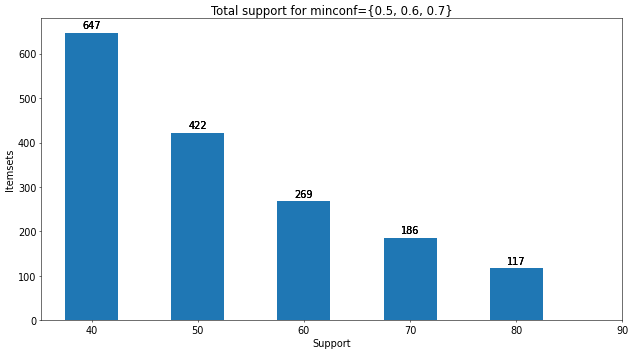

In [120]:
import matplotlib.pyplot as plt
plt.figure(num=1,figsize=(15,8), dpi=50)
cntnr = plt.bar(res_df.index, res_df['Freq Items'], width=5)
plt.xticks(np.arange(40,100,10))
plt.bar_label(container=cntnr,padding=3)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.rc('font',size=14)
plt.title('Total support for minconf={0.5, 0.6, 0.7}')
plt.show()

In [122]:
pltdf=res_df.loc[res_df['Confidence'] == 0.5]
pltdf

,Confidence,Freq Items,2-rules,3-rules
Support,,,,
40,0.5,647,48,129
50,0.5,422,31,6
60,0.5,269,21,0
70,0.5,186,9,0
80,0.5,117,5,0


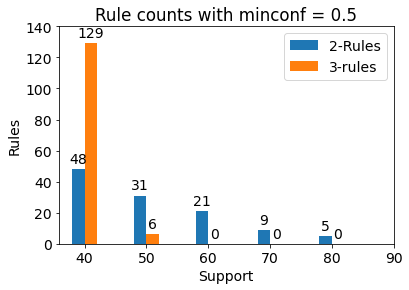

In [133]:
plt.close()
mconf = 0.5
width = 2
fig, ax = plt.subplots()
pltdf=res_df.loc[res_df['Confidence'] == mconf]
rects1 = ax.bar(pltdf.index - width/2,height=pltdf['2-rules'],width=width, label='2-Rules')
rects2 = ax.bar(pltdf.index + width/2,height=pltdf['3-rules'],width=width, label='3-rules' )
ax.set_xticks(np.arange(40,100,10))
ax.set_yticks(np.arange(0,160,20))
ax.set_xlabel('Support')
ax.set_ylabel('Rules')
ax.set_title('Rule counts with minconf = ' + str(mconf))
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend()
plt.show()

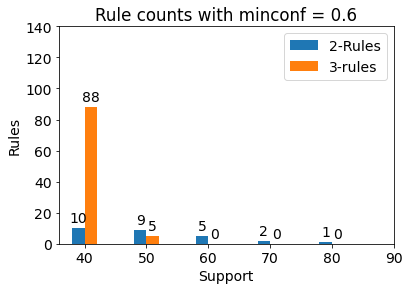

In [134]:
plt.close()
mconf = 0.6
width = 2
fig, ax = plt.subplots()
pltdf=res_df.loc[res_df['Confidence'] == mconf]
rects1 = ax.bar(pltdf.index - width/2,height=pltdf['2-rules'],width=width, label='2-Rules')
rects2 = ax.bar(pltdf.index + width/2,height=pltdf['3-rules'],width=width, label='3-rules' )
ax.set_xticks(np.arange(40,100,10))
ax.set_yticks(np.arange(0,160,20))
ax.set_xlabel('Support')
ax.set_ylabel('Rules')
ax.set_title('Rule counts with minconf = ' + str(mconf))
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend()
plt.show()

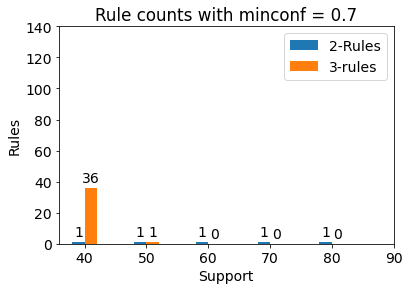

In [136]:
plt.close()
mconf = 0.7
width = 2
fig, ax = plt.subplots()
pltdf=res_df.loc[res_df['Confidence'] == mconf]
rects1 = ax.bar(pltdf.index - width/2,height=pltdf['2-rules'],width=width, label='2-Rules')
rects2 = ax.bar(pltdf.index + width/2,height=pltdf['3-rules'],width=width, label='3-rules' )
ax.set_xticks(np.arange(40,100,10))
ax.set_yticks(np.arange(0,160,20))
ax.set_xlabel('Support')
ax.set_ylabel('Rules')
ax.set_title('Rule counts with minconf = ' + str(mconf))
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend()
plt.show()

In [22]:
# minsup, minconf = 5, 0.5
minsup, minconf = 40, 0.5
# minsup, minconf = 60, 0.5
# minsup, minconf = 60, 0.5

In [23]:
# FP-Tree generateion of 4-itemsets with support count and pruning
from collections import OrderedDict
fp = OrderedDict()

# 1-itemset support counting
for t in hashtable.values():
    for ii in range(len(t)):
        i = int(t[ii])
        fp[i] = fp.get(i, OrderedDict())
        fp[i]["count"] = fp[i].get("count", 0) + 1

# 2-itemset support counting
for t in hashtable.values():
    for ii in range(len(t)):
        i = int(t[ii])
        # if support count is too low
        # prune 1-itemset
        if i in fp and fp[i]["count"] < minsup:
            continue
        if i not in fp:
            continue
        for ji in range(ii+1, len(t)):
            j = int(t[ji])
            fp[i][j] = fp[i].get(j, OrderedDict())
            fp[i][j]["count"] = fp[i][j].get("count", 0) + 1

# 3-itemset support counting            
for t in hashtable.values():
    for ii in range(len(t)):
        i = int(t[ii])
        # if fp[i]["count"] < minsup:
        #     continue
        if i not in fp:
            continue
        for ji in range(ii+1, len(t)):
            j = int(t[ji])
            # if support count is too low
            # prune 2-itemset
            if j in fp[i] and fp[i][j]["count"] < minsup:
                del fp[i][j]
                continue
            if j not in fp[i]:
                continue    
            for ki in range(ji+1, len(t)):
                k = int(t[ki])
                fp[i][j][k] = fp[i][j].get(k, OrderedDict())
                fp[i][j][k]["count"] = fp[i][j][k].get("count", 0) + 1

# 4-itemset support couting
for t in hashtable.values():
    for ii in range(len(t)):
        i = int(t[ii])
        # if fp[i]["count"] < minsup:
        #     continue
        if i not in fp:
            continue
        for ji in range(ii+1, len(t)):
            j = int(t[ji])
            # if fp[i][j]["count"] < minsup:
            #     continue
            if j not in fp[i]:
                continue 
            for ki in range(ji+1, len(t)):
                k = int(t[ki])
                # if support count is too low
                # prune 3-itemset
                if k in fp[i][j] and fp[i][j][k]["count"] < minsup:
                    del fp[i][j][k]
                    continue
                if k not in fp[i][j]:
                    continue
                for li in range(ki+1, len(t)):
                    l = int(t[li])
                    fp[i][j][k][l] = fp[i][j][k].get(l, OrderedDict())
                    fp[i][j][k][l]["count"] = fp[i][j][k][l].get("count", 0) + 1
                
ctr = 0
for k, v in fp.items():
    ctr += v["count"]
fp["count"] = ctr

In [24]:
print(fp["count"])

55994


In [25]:
# Support counting

# Dictionary of 1-itemsets, 2-itemsets, and 3-itemsets with support count

itemsets = dict()
itemsets[1] = OrderedDict()
itemsets[2] = OrderedDict()
itemsets[3] = OrderedDict()
itemsets[4] = OrderedDict()

def generate(node, s, len=0):
    # Support count-based pruning
    if "count" in node and node["count"] < minsup:
        return
    if len >= 1:
        itemset = tuple(sorted(s))
        itemsets[len][itemset] = node["count"]
    if len == 4:
        return
    for k in node:
        if k != "count":
            generate(node[k], s + [int(k)], len+1)

generate(fp, [])

In [26]:
# Rule generation for 2-itemsets with minsup a and minconf b
rules = dict()
rules[2] = dict()
rules[3] = dict()
rules[2]["antecedent"] = list()
rules[2]["consequent"] = list()
rules[2]["support count"] = list()
rules[2]["confidence"] = list()
rules[3]["antecedent"] = list()
rules[3]["consequent"] = list()
rules[3]["support count"] = list()
rules[3]["confidence"] = list()


for k, v in itemsets[2].items():
    # print(", ".join(list(map(str, list(k)))), end="\t")
    # print("count: ", str(v))
    f, s = k
    n, d = v, itemsets[1][tuple([f])]
    conf = n / d
    if conf >= minconf:
        rules[2]["antecedent"].append(f)
        rules[2]["consequent"].append(s)
        rules[2]["support count"].append(n)
        rules[2]["confidence"].append(round(conf, 4))
        # rules[2][f"{f} -> {s}"] =  [round(conf, 4), n]
    d = itemsets[1][tuple([s])]
    conf = n / d
    if conf >= minconf:
        rules[2]["antecedent"].append(f)
        rules[2]["consequent"].append(s)
        rules[2]["support count"].append(n)
        rules[2]["confidence"].append(round(conf, 4))
        # rules[2][f"{f} -> {s}"] = [round(conf, 4), n]

# for k, v in rules[2].items():
#     print(k, end="\t\t")
#     print("support count: ", str(v[1]), end="\t\t")
#     print("confidence: ", str(v[0])) 

In [27]:
# Rule generation for 3-itemsets with minsup a and minconf b

seen = set()

def rule_gen_3_2(three: tuple, prevant: tuple):
    f, m, e = three
    pf, ps = prevant
    diff = list(set([f, m, e]).difference(set([pf, ps])))[0]
    ant, cons =  tuple([pf]), tuple(sorted([ps, diff]))
    n, d = itemsets[3][three], itemsets[1][ant]
    conf = n / d
    sant = ", ".join(list(map(str, list(ant))))
    scons = ", ".join(list(map(str, list(cons))))
    rulestr = f"{sant}\t--->\t{scons}"
    if conf >= minconf and rulestr not in seen:
        seen.add(rulestr)
        rules[3]["antecedent"].append(sant)
        rules[3]["consequent"].append(scons)
        rules[3]["support count"].append(n)
        rules[3]["confidence"].append(round(conf, 4))
        # rules[3][rulestr] = [round(conf, 4), n]
    ant, cons =  tuple([ps]), tuple(sorted([pf, diff]))
    n, d = itemsets[3][three], itemsets[1][ant]
    conf = n / d
    sant = ", ".join(list(map(str, list(ant))))
    scons = ", ".join(list(map(str, list(cons))))
    rulestr = f"{sant}\t--->\t{scons}"
    if conf >= minconf and rulestr not in seen:
        seen.add(rulestr)
        rules[3]["antecedent"].append(sant)
        rules[3]["consequent"].append(scons)
        rules[3]["support count"].append(n)
        rules[3]["confidence"].append(round(conf, 4))
        # rules[3][rulestr] = [round(conf, 4), n]
    

def rule_gen_3(three: tuple):
    f, m, e = three
    ant = tuple(sorted([m, e]))
    cons  = tuple([f])
    n, d = itemsets[3][three], itemsets[2][ant]
    conf = n / d
    sant = ", ".join(list(map(str, list(ant))))
    scons = ", ".join(list(map(str, list(cons))))
    rulestr = f"{sant}\t--->\t{scons}"
    if conf >= minconf and rulestr not in seen:
        rules[3]["antecedent"].append(sant)
        rules[3]["consequent"].append(scons)
        rules[3]["support count"].append(n)
        rules[3]["confidence"].append(round(conf, 4))
        # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
        rule_gen_3_2(three, ant)
    ant, cons = tuple(sorted([f, e])), tuple([m])
    n, d = itemsets[3][three], itemsets[2][ant]
    conf = n / d
    sant = ", ".join(list(map(str, list(ant))))
    scons = ", ".join(list(map(str, list(cons))))
    rulestr = f"{sant}\t--->\t{scons}"
    if conf >= minconf and rulestr not in seen:
        rules[3]["antecedent"].append(sant)
        rules[3]["consequent"].append(scons)
        rules[3]["support count"].append(n)
        rules[3]["confidence"].append(round(conf, 4))
        # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
        rule_gen_3_2(three, ant)
    ant, cons = tuple(sorted([f, m])), tuple([e])
    n, d = itemsets[3][three], itemsets[2][ant]
    conf = n / d
    if conf >= minconf:
        sant = ", ".join(list(map(str, list(ant))))
        scons = ", ".join(list(map(str, list(cons))))
        rules[3]["antecedent"].append(sant)
        rules[3]["consequent"].append(scons)
        rules[3]["support count"].append(n)
        rules[3]["confidence"].append(round(conf, 4))
        # rules[3][f"{sant}\t--->\t{scons}"] = [round(conf, 4), n]
        rule_gen_3_2(three, ant)
    
    
for k, v in itemsets[3].items(): 
    rule_gen_3(k)

# for k, v in rules[3].items():
#     print(k, end="\t\t")
#     print("support count: ", str(v[1]), end="\t\t")
#     print("confidence: ", str(v[0]))   

In [28]:
#Dataframe for 2-itemset rules
import pandas as pd

two_itemset_rules = pd.DataFrame(rules[2])

In [29]:
two_itemset_rules.head(10)

,antecedent,consequent,support count,confidence
0,27,167,68,0.5271
1,27,291,56,0.5000
2,27,297,65,0.5039
3,37,49,75,0.5068
4,41,72,44,0.5000
5,51,804,61,0.5922
6,51,804,61,0.6778
7,62,71,62,0.6139
8,47,75,48,0.5455
9,166,167,45,0.5233


In [30]:
#Dataframe for 3-itemset rules
import pandas as pd

three_itemset_rules = pd.DataFrame(rules[3])

In [31]:
three_itemset_rules.head(10)

,antecedent,consequent,support count,confidence
0,"167, 320",27,41,0.5616
1,"27, 320",167,41,0.6949
2,"27, 167",320,41,0.6029
3,"291, 297",27,42,0.5833
4,"27, 297",291,42,0.6462
5,"27, 291",297,42,0.7500
6,"295, 297",27,45,0.5114
7,"27, 297",295,45,0.6923
8,"27, 295",297,45,0.7143
9,"297, 298",27,43,0.5181
